In [2]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
get_ipython().magic(u'pylab notebook')
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')


Populating the interactive namespace from numpy and matplotlib


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import poseEval
reload(poseEval)
import romainLegConfig
reload(romainLegConfig)
from romainLegConfig import bottomconf as conf
# from romainLegConfig import side1conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseEval.poseEvalTrain(conf,restore=False)


In [6]:
# Gradient analysis
import poseEval
reload(poseEval)
from poseEval import *
import tensorflow as tf
from romainLegConfig import bottomconf as conf

useNet = False
restore = True

tf.reset_default_graph()
ph,feed_dict,out,queue,out_dict = poseEvalNetInit(conf)
feed_dict[ph['phase_train']] = True
feed_dict[ph['keep_prob']] = 1.
evalSaver = createEvalSaver(conf) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(out,ph['y'])
correct_pred = tf.equal(tf.argmax(out,1),tf.argmax(ph['y'],1))

loss = tf.reduce_mean(cross_entropy)
tf.summary.scalar('cross_entropy',loss)

opt = tf.train.AdamOptimizer(learning_rate= \
                  ph['learning_rate']).minimize(loss)

merged = tf.summary.merge_all()


sess =  tf.InteractiveSession()
data = createCursors(sess,queue,conf)
updateFeedDict(conf,'train',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    evalstartat = restoreEval(sess,evalSaver,restore,conf,feed_dict)
    initializeRemainingVars(sess,feed_dict)

            #* conf.gamma**math.floor(excount/conf.step_size)
feed_dict[ph['learning_rate']] = 0
feed_dict[ph['keep_prob']] = 1.
feed_dict[ph['phase_train']] = False



<IPython.core.display.Javascript object>


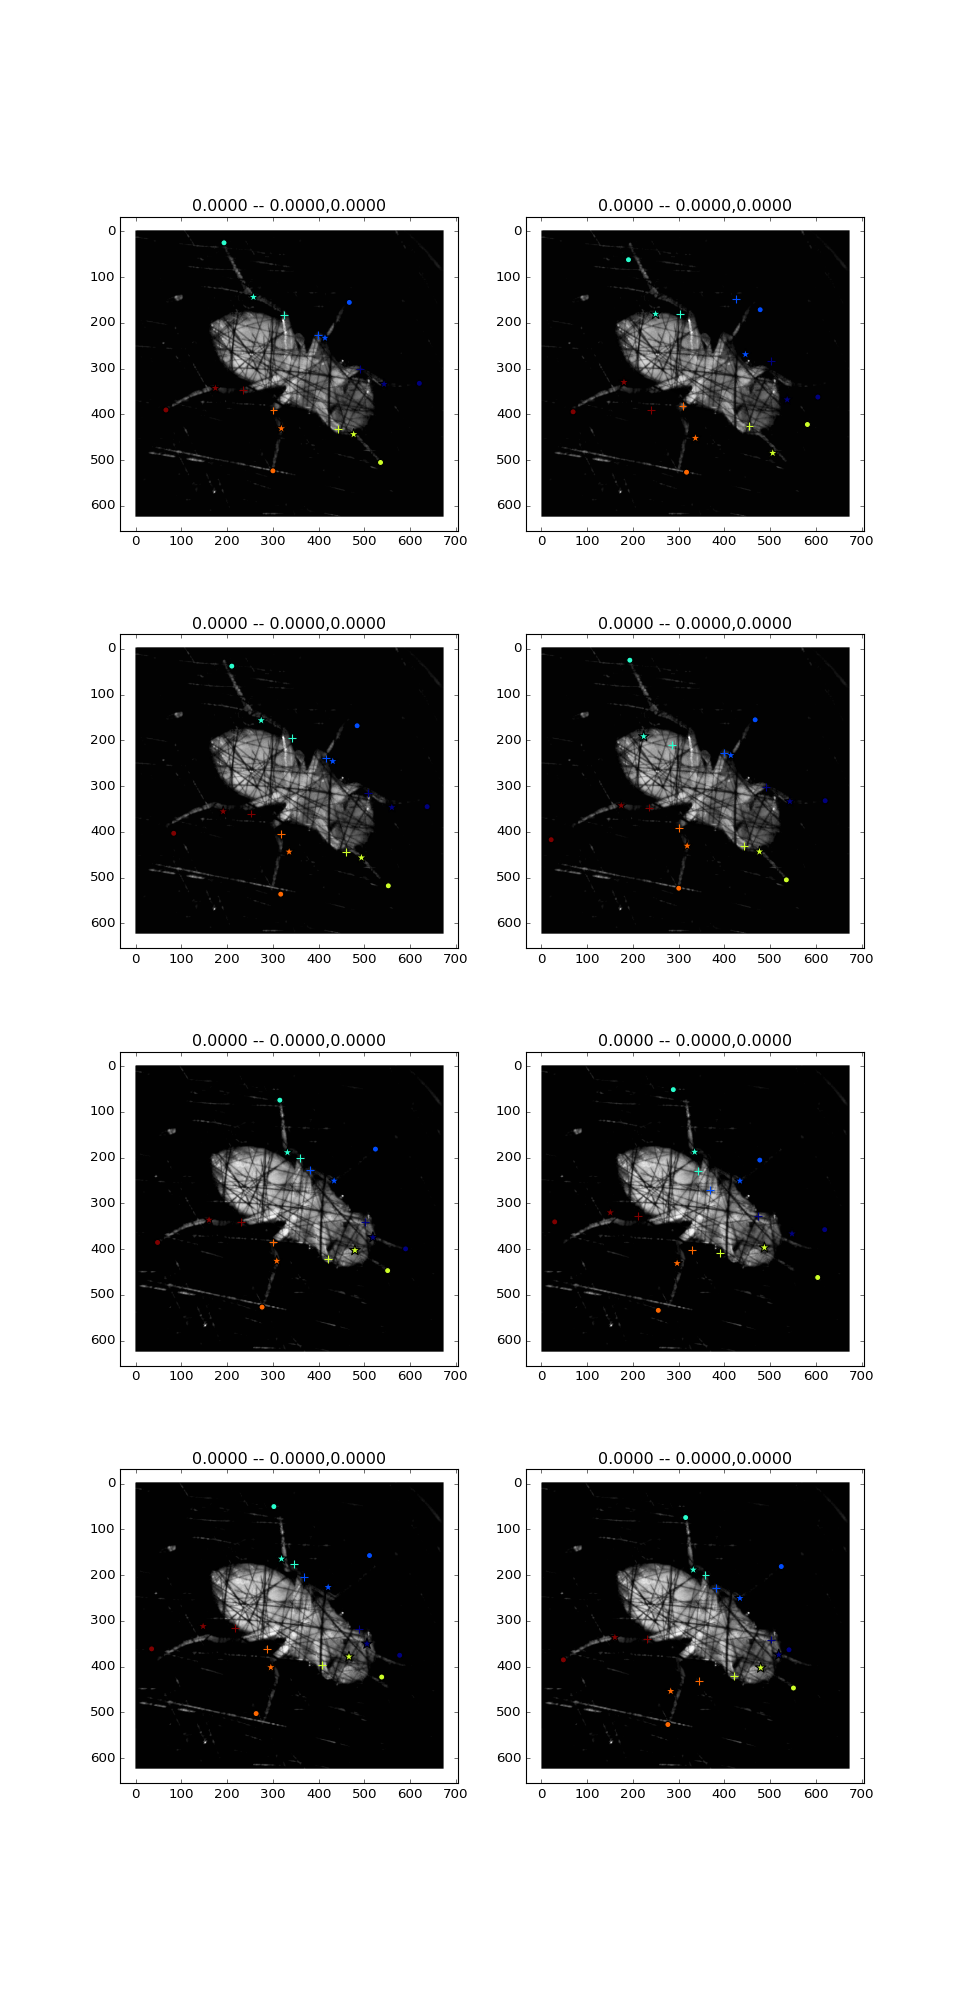

In [7]:
for ndx in range(np.random.randint(50)):
    alllocs = updateFeedDict(conf,'val',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    oo,cc = sess.run([out,cross_entropy],feed_dict=feed_dict)
else:
    oo = np.zeros([8,2])
    cc = np.zeros([8,])

ims = feed_dict[ph['X'][0]]

nc = 2; nr = 4
fig = plt.figure(figsize=[12,25])
mrk = ['o','*','+']
ss = [30,100,50]
for idx in range(ims.shape[0]):
    ax = fig.add_subplot(nr,nc,idx+1)
    ax.imshow(ims[idx,:,:,0],cmap='gray')
    for jj in range(3):
        ax.scatter(alllocs[idx,jj*6:(jj+1)*6,0],alllocs[idx,jj*6:(jj+1)*6,1],
                   c=np.linspace(0,1,6),cmap=cm.jet,marker=mrk[jj],s=ss[jj])
    ax.set_title('{:.4f} -- {:.4f},{:.4f}'.format(cc[idx],oo[idx,0],oo[idx,1]))

In [ ]:
vv = tf.global_variables()



import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

rr = [s/w for s,w in zip(ss,ww)]

In [ ]:
#for new
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b
bbnew = bb

In [ ]:
#for reloaded
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
for v in vv:
    if re.search('beta|gamma',v.name):
        print v.eval()

In [ ]:
import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

In [ ]:
ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

In [ ]:
rr = [s/w for s,w in zip(ss,ww)]

bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
plt.hist(rr)
